In [5]:
import os 
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import re

In [132]:
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
})

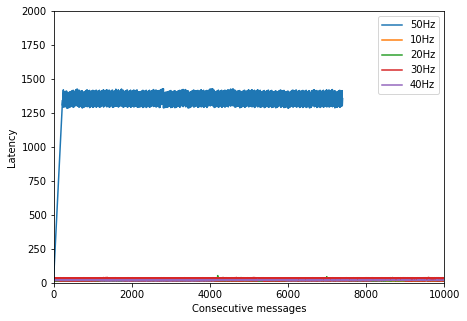

In [68]:
# GENERATE GRAPHS

files = next(os.walk("./data/"))[2]

position = "farair"
date = "210320"


plt.figure(figsize=(7, 5))
plt.ylabel("Latency (ms)")
plt.xlabel("Consecutive messages")
plt.xlim(0, 10000)
plt.ylim(0, 2000)
results = {}
for f in files:
    if f.startswith(r"{}_sender".format(position)):
        frequency = re.search(r"\d{2}", f).group(0)
        sender = np.array(pd.read_csv('./data/{}_sender_{}Hz_{}.csv'.format(position, frequency, date), sep=',',header=None))
        drone = np.array(pd.read_csv('./data/{}_drone_{}Hz_{}.csv'.format(position, frequency, date), sep=',',header=None))
        x = np.isin(sender[:, 0], drone[:, 0])
        latency = np.subtract(drone[:, 1], sender[x, 1]) 
        results[frequency] = {"std": np.std(latency)}
        results[frequency].update({"mean": np.mean(latency)})
        results[frequency].update({"packet_loss": np.count_nonzero((x == False)) / len(x)})
        plt.plot(latency, label="{}Hz".format(frequency))


plt.legend()
# plt.savefig('plot_{}_{}.pgf'.format(position, date))

Print(results)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

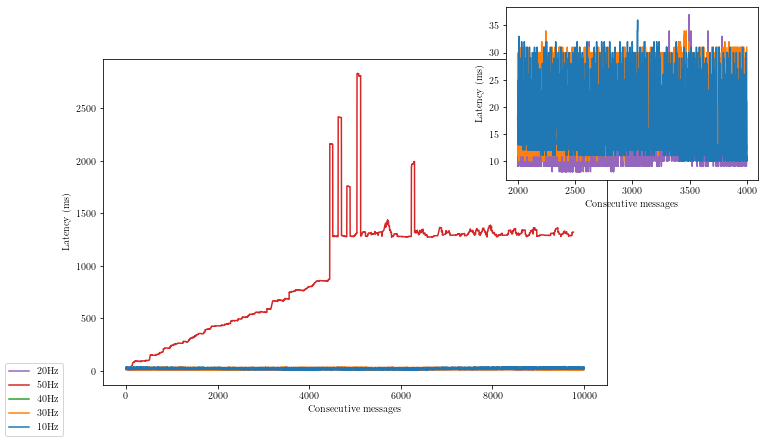

In [142]:
# GENERATE FANCY GRAPH WITH ENLARGENED AREA

files = next(os.walk("./data/"))[2]

position = "ground"
date = "07032020"

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
fig, ax = plt.subplots(figsize=[7, 6])
ax.set_ylabel("Latency (ms)")
ax.set_xlabel("Consecutive messages")
# ax.xlim(0, 10000)
# ax.ylim(0, 2000)
results = {}
for f in files:
    if f.startswith(r"{}_sender".format(position)):
        frequency = re.search(r"\d{2}", f).group(0)
        sender = np.array(pd.read_csv('./data/{}_sender_{}Hz_{}.csv'.format(position, frequency, date), sep=',',header=None))
        drone = np.array(pd.read_csv('./data/{}_drone_{}Hz_{}.csv'.format(position, frequency, date), sep=',',header=None))
        x = np.isin(sender[:, 0], drone[:, 0])
        latency = np.subtract(drone[:, 1], sender[x, 1]) 
        results[frequency] = {"std": np.std(latency)}
        results[frequency].update({"mean": np.mean(latency)})
        results[frequency].update({"packet_loss": np.count_nonzero((x == False)) / len(x)})
        color = colors.pop()
        ax.plot(latency[0:10000], color=color,label="{}Hz".format(frequency))
        if frequency != "50":
            mini_ax = fig.add_axes([1, 0.6, 0.5, 0.4])
            mini_ax.set_ylabel("Latency (ms)")
            mini_ax.set_xlabel("Consecutive messages")
            mini_ax.plot(np.arange(2000, 4000), latency[2000:4000],color=color)


from matplotlib.pyplot import subplots_adjust
subplots_adjust(left=0.2, right=1.2)
fig.legend(bbox_to_anchor=(-0.0, -0.0), loc=3)

fig.savefig('plot_{}_{}.pdf'.format(position, date), bbox_inches="tight")
plt.show()
# plt.show()
# print(results)

In [ ]:
«

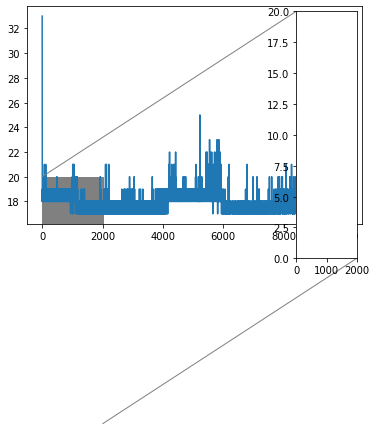

In [63]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.plot(latency)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 1, loc=1) # zoom-factor: 2.5, location: upper-left
x1, x2, y1, y2 = 0, 2000, 0, 20 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="0.5", ec="0.5")
plt.show()

In [64]:
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])

# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
ax.indicate_inset_zoom(axins)


(<matplotlib.patches.Rectangle at 0x125417b90>,
 (<matplotlib.patches.ConnectionPatch at 0x1253e74d0>,
  <matplotlib.patches.ConnectionPatch at 0x124dc6110>))

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x11ea07350>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x11e08eb90>)

In [19]:
axins

In [23]:
)

In [ ]:
fig, ax = plt.subplot